# Lead Scoring Case Study

__Our Goals of the Case Study:__

- To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
- To **adjust to if the company's requirement changes** in the future so you will need to handle these as well.

__Steps:__
1. Read and understand the data
2. Clean the data
3. Prepare the data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

In [515]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 1. Loading and Cleaning Data

In [516]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [517]:
## checking bottom 5 rows
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [518]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [519]:
##  checking datatypes and also null values
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [520]:
## checking shape of dataframe
lead.shape

(9240, 37)

In [521]:
## cheking total size of dataframe
lead.size

341880

## 1.1  Data Cleaning and Preparation

In [522]:
# Check the number of missing values in each column

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [523]:
###  using this method for finding % of null values, so i can decide either drop or replace
percent_missing = lead.isnull().sum() * 100 / len(lead)
percent_missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [524]:
## Finding columns which are having more than 40% null values
to_drop=lead.loc[:,list(round((100*lead.isnull().sum()/lead.shape[0]),2)>40)].columns
to_drop

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [525]:
## Dropping columns that have more than 40% null values
lead=lead.drop(to_drop,axis=1)

In [526]:
#checking null values in percentage
round((100*lead.isnull().sum()/lead.shape[0]),2).sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

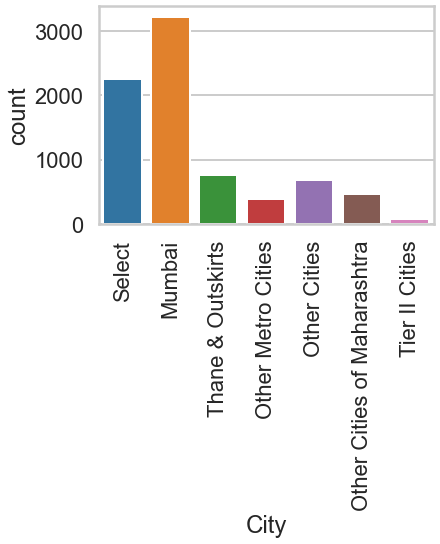

In [527]:
## Checking/ visualizing City variable 
sns.countplot(lead.City)
plt.xticks(rotation = 90)
plt.show()

In [528]:
# Imputing Null with 'Others'
lead['City'] = lead['City'].replace(np.nan, 'Others')

In [529]:
# Merging Cities which are low in numbers to 'Others'
lead['City'] = lead['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

lead['City'].value_counts()

Mumbai               3222
Others               3017
Select               2249
Thane & Outskirts     752
Name: City, dtype: int64

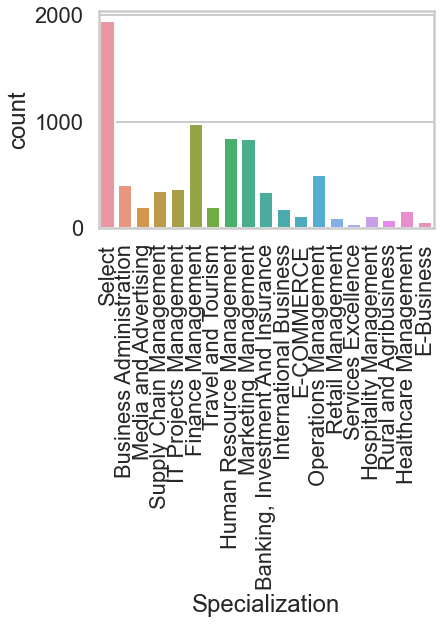

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [530]:
## Checking/ visualizing Specialization variable
sns.countplot(lead.Specialization)
plt.xticks(rotation = 90)
plt.show()

lead.Specialization.value_counts()

In [531]:
# Imputing Null with 'Others'
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

# Merging Specialization which are low in numbers to 'Others'
lead['Specialization'] = lead['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

lead.Specialization.value_counts()

Select                               1942
Others                               1608
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

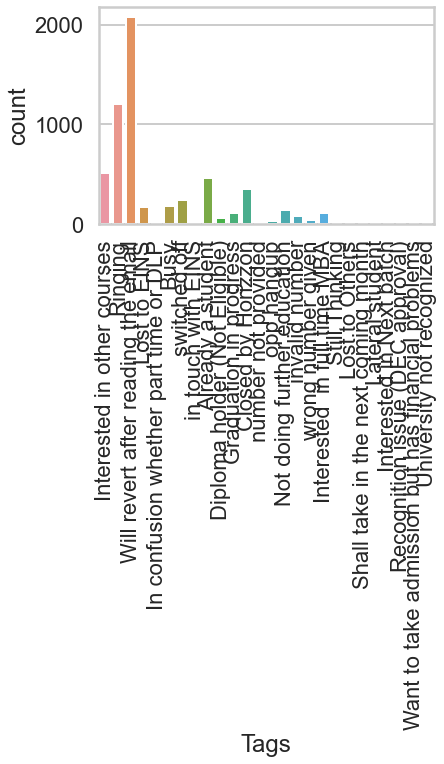

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [532]:
## Checking Tags
sns.countplot(lead.Tags)
plt.xticks(rotation = 90)
plt.show()

lead.Tags.value_counts()

In [533]:
# Imputing Null with Others
lead['Tags'] = lead['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others (each category should have minimum 5% of total data)
lead['Tags'] = lead['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

lead.Tags.value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

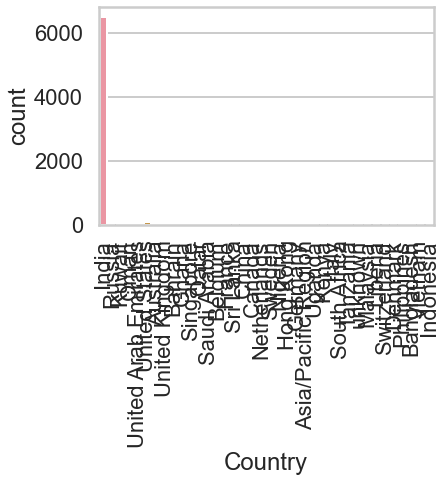

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [534]:
# Imputing Null with Others
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Other')

lead['What is your current occupation'].value_counts()

## Checking Country
sns.countplot(lead['Country'])
plt.xticks(rotation = 90)
plt.show()

lead['Country'].value_counts()

In [535]:
## drop 'Country' as it is highly skewed
lead=lead.drop('Country',axis=1)

In [536]:
## Checking Last Activity
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [537]:
# Imputing Null with Others
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Others')

In [538]:
# Merging low frequency items to Others
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

## Checking Last Activity
lead['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [539]:
# Checking unique value counts of Lead Source 

lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [540]:
# Merging 2 Google into one category
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

In [541]:
# Imputing Null with Others
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Others')

In [542]:
# Merging low frequency items to Others
lead['Lead Source'] = lead['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

# Checking unique value counts 
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64

In [543]:
## Checking Last Notable Activity
lead['Last Notable Activity'].value_counts()

# Merging low frequency items to Others
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                                                         'Had a Phone Conversation', 'Email Marked Spam', 
                                                                         'Resubscribed to emails', 'Approached upfront', 
                                                                         'Email Received', 'Form Submitted on Website', 
                                                                         'View in browser link Clicked'], 'Others')

In [544]:
# Checking TotalVisits
lead.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [545]:
# Impute TotalVisits with the median
TotalVisits_med = lead.TotalVisits.median()
lead.TotalVisits.fillna(TotalVisits_med, inplace=True)

In [546]:
# Checking Page Views Per Visit
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [547]:
# Impute Page Views Per Visit with the median
pvpv_med = lead['Page Views Per Visit'].median()
lead['Page Views Per Visit'].fillna(pvpv_med, inplace=True)

# 2. Data Visualization/ EDA

In [548]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


## 2.1 Univariate Analysis

#### Categorical unordered univariate analysis

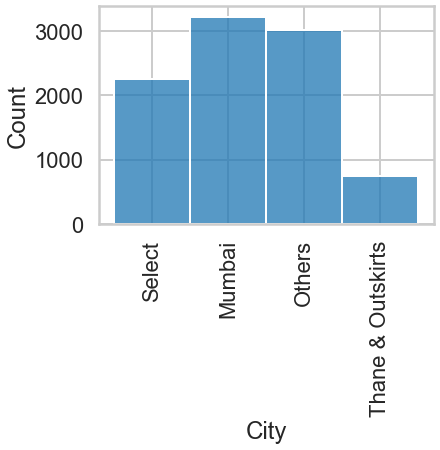

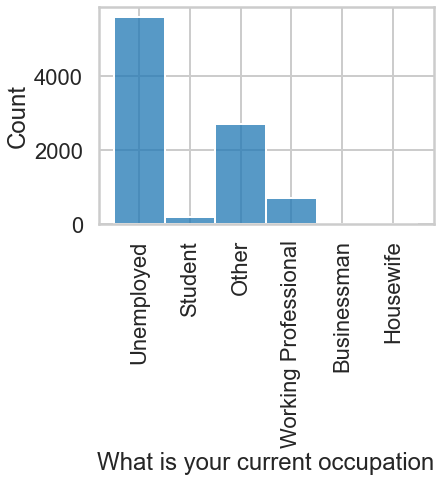

In [549]:
sns.histplot(lead['City'], bins = 250).tick_params(axis='x', rotation = 90)
plt.show()
sns.histplot(lead['What is your current occupation'], bins = 250).tick_params(axis='x', rotation = 90)
plt.show()


<AxesSubplot:ylabel='Specialization'>

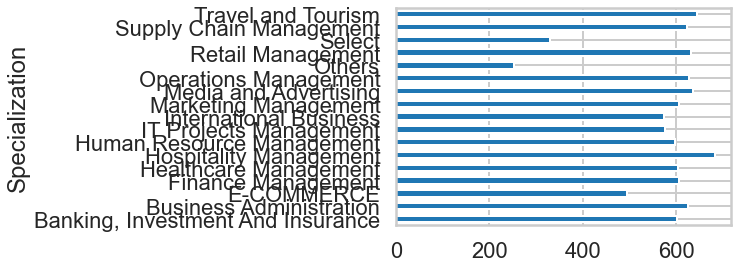

In [550]:
lead.groupby("Specialization")["Total Time Spent on Website"].mean().plot.barh()

### Categorical ordered univariate analysis

Mumbai               0.348701
Others               0.326515
Select               0.243398
Thane & Outskirts    0.081385
Name: City, dtype: float64


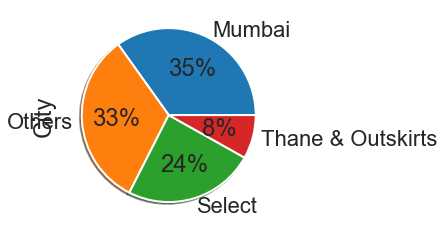

Unemployed              0.606061
Other                   0.292857
Working Professional    0.076407
Student                 0.022727
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64


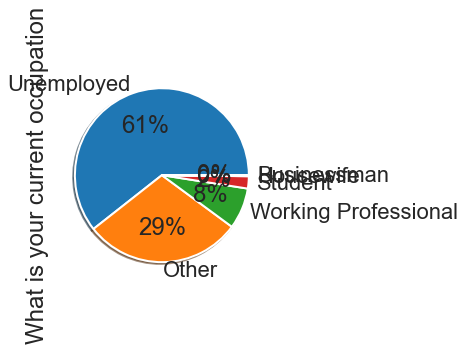

In [551]:
#calculate the percentage of each City category.
print(lead.City.value_counts(normalize=True))

#plot the pie chart of City categories
lead.City.value_counts(normalize=True).plot.pie(shadow = True,autopct = '%1.0f%%')
plt.show()

#calculate the percentage of each Country category.
print(lead['What is your current occupation'].value_counts(normalize=True))

#plot the pie chart of Country categories
lead['What is your current occupation'].value_counts(normalize=True).plot.pie(shadow = True,autopct = '%1.0f%%')
plt.show()

## 2.2 Bivariate and Multivariate Analysis

### Numeric- numeric analysis

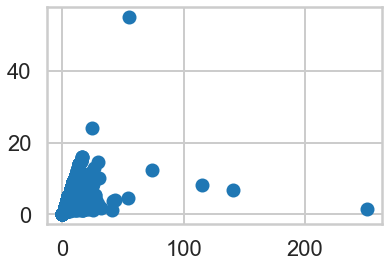

In [552]:
#plot the scatter plot of Page Views Per Visit and TotalVisits variable in lead
plt.scatter(lead.TotalVisits, lead['Page Views Per Visit'])
plt.show()

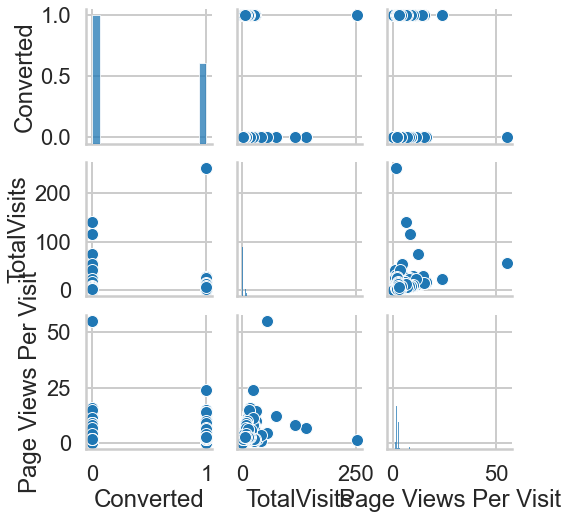

In [553]:
## For visualisation of multiple variable
sns.pairplot(data=lead, vars=['Converted', 'TotalVisits', 'Page Views Per Visit'])
plt.show()

as per above operation we can understand total visits and page views per visit has high correlation

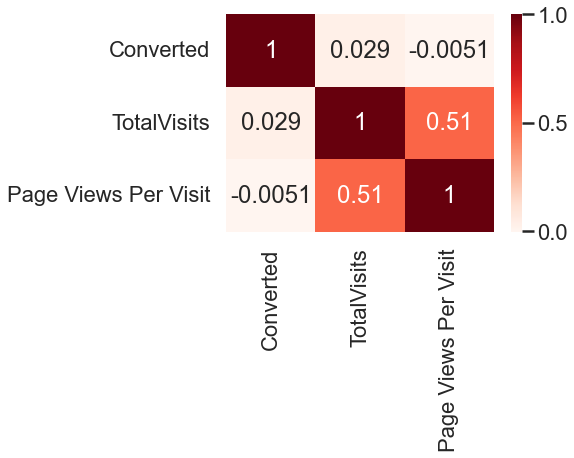

In [554]:
###  gets a visualisation of the numeric data.
sns.heatmap(lead[['Converted', 'TotalVisits', 'Page Views Per Visit']].corr(), annot=True, cmap='Reds')
plt.show()

### Numerical categorical variable

Converted
0    330.404473
1    738.546757
Name: Total Time Spent on Website, dtype: float64


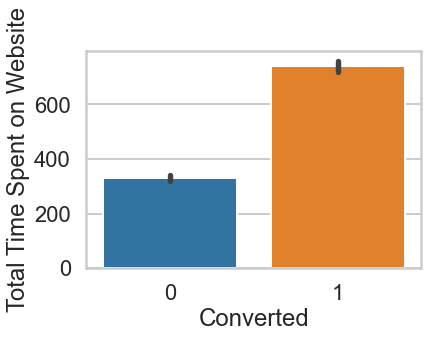

In [555]:
print(lead.groupby('Converted')['Total Time Spent on Website'].mean())

#plot the box plot for 0 & 1 Converted.
sns.barplot(data=lead,x= 'Converted', y='Total Time Spent on Website')
plt.show()

### Multivariate analysis

In [556]:
lead.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened


In [557]:
MultivariateAnalysis = pd.pivot_table(data=lead, index='What is your current occupation', columns='City', values='Converted')
MultivariateAnalysis

City,Mumbai,Others,Select,Thane & Outskirts
What is your current occupation,,,,
Businessman,0.000000,1.000000,0.750000,0.000000
Housewife,1.000000,1.000000,NaN,1.000000
Other,0.175202,0.122778,0.250000,0.175000
Student,0.510638,0.437500,0.125000,0.583333
Unemployed,0.419991,0.428434,0.444212,0.485549
Working Professional,0.927126,0.900709,0.930769,0.844828


<AxesSubplot:xlabel='City', ylabel='What is your current occupation'>

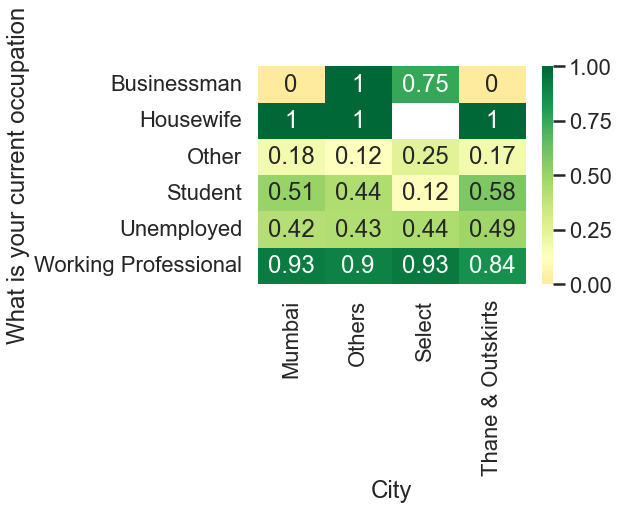

In [558]:
sns.heatmap(MultivariateAnalysis, annot=True, cmap='RdYlGn',center = 0.117)

<Figure size 1440x1080 with 0 Axes>

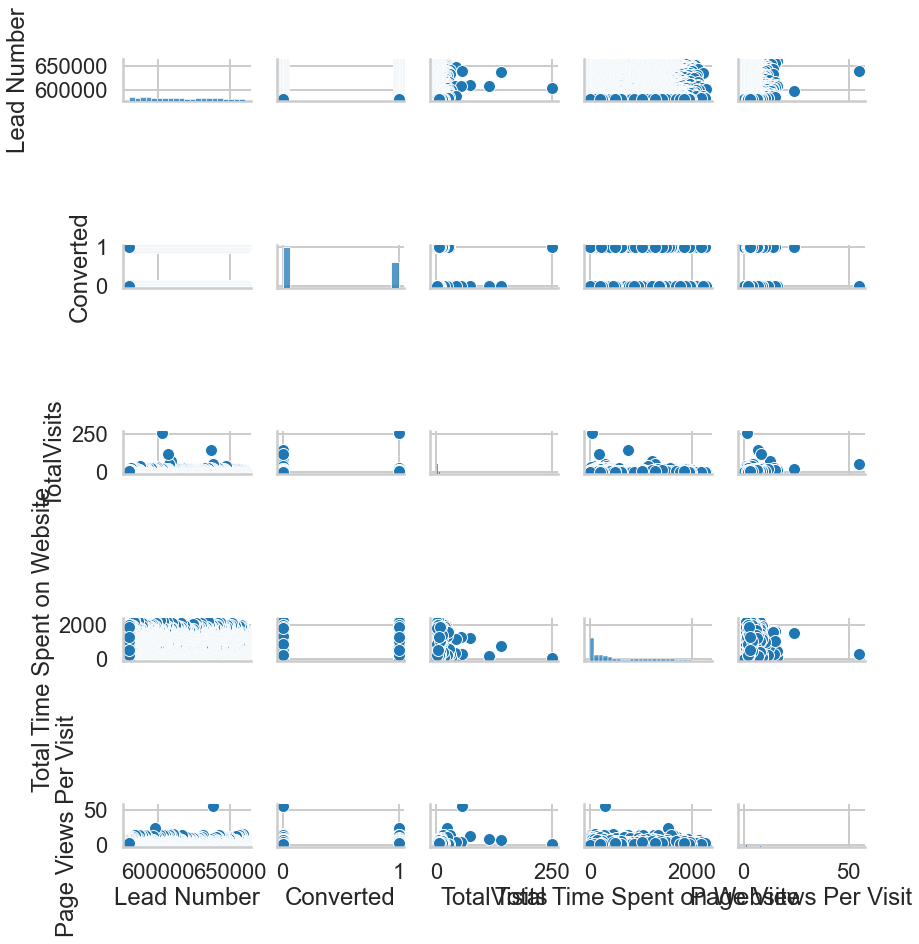

In [559]:
plt.figure(figsize=(20,15))
sns.pairplot(lead)
plt.show()

as per above operation we can understand lead number and total time spent on website has highest correlation

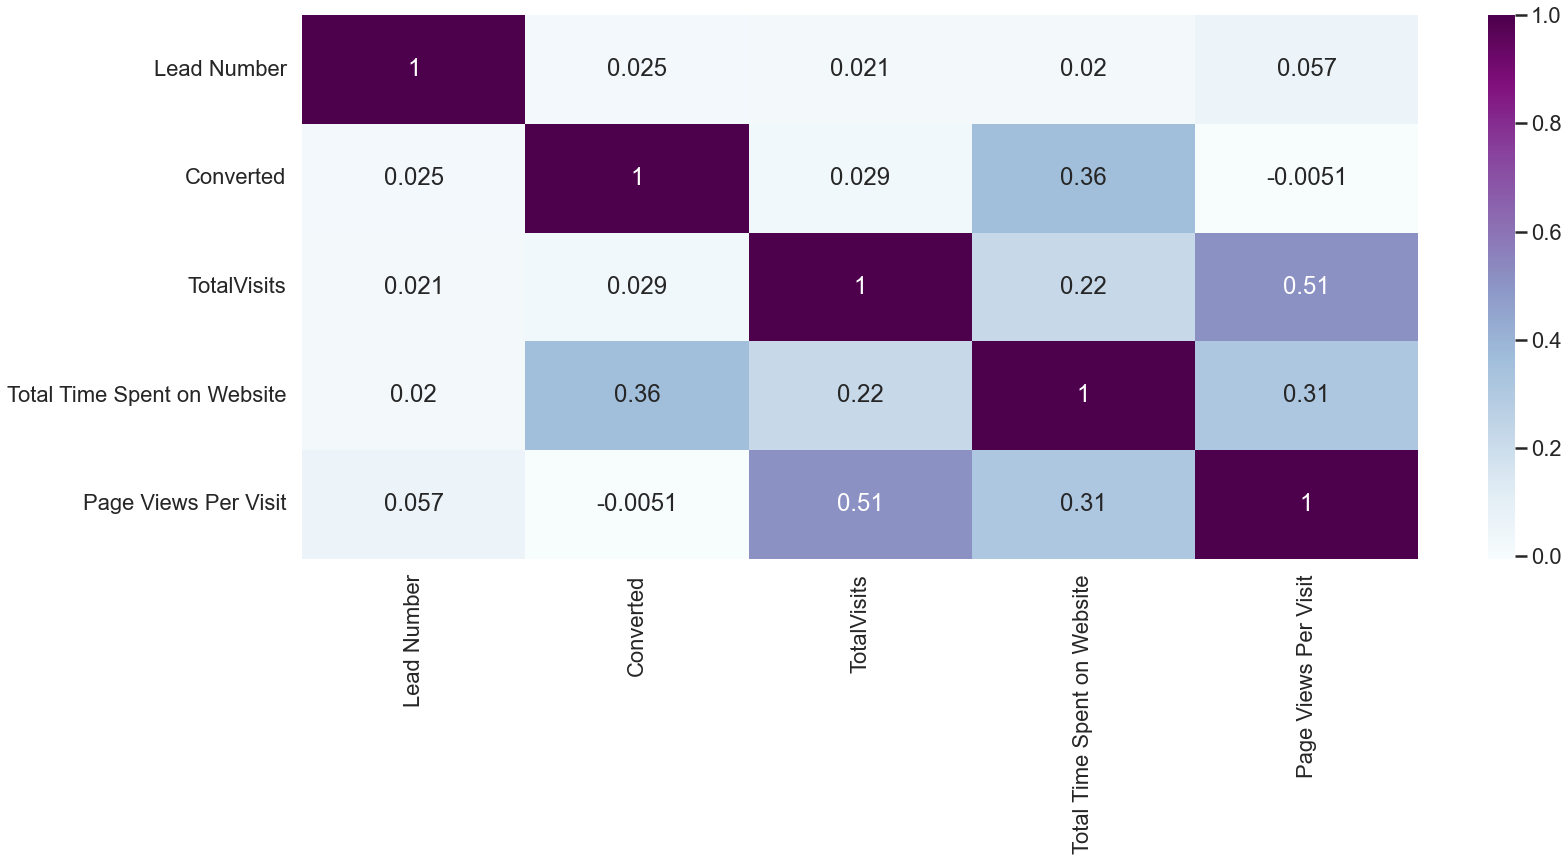

In [560]:
#Correlations for numeric variables
cor=lead.corr()
plt.figure(figsize=(25,10))

sns.heatmap(cor, cmap="BuPu", annot = True)
plt.show()

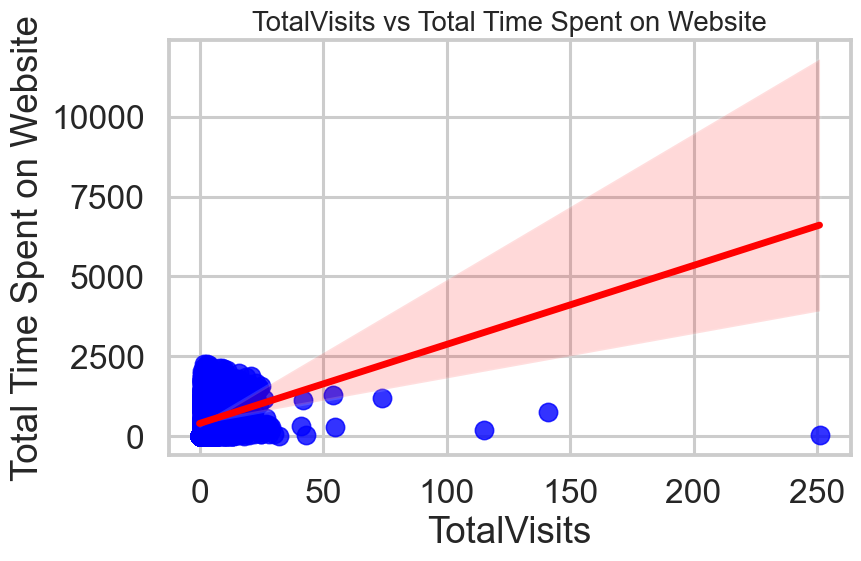

In [561]:
plt.figure(figsize=(8,5),dpi=110)
plt.title("TotalVisits vs Total Time Spent on Website",fontsize=18)
sns.regplot(data=lead,y="Total Time Spent on Website",x="TotalVisits", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("TotalVisits")
plt.show()

as we can see total time spent on website is increasing 

In [562]:
lead.drop(['Prospect ID'], axis = 1, inplace  = True)

# 3. Data Preparation for Linear Regression

In [563]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [564]:
#Subset of all categorical variables
lead_categorical=lead.select_dtypes(include=['object'])
lead_categorical.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Others,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


## 3.1 Dummy Variables

In [565]:
#Convert into dummies

lead_dummies = pd.get_dummies(lead_categorical, drop_first=True)
lead_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Others,City_Select,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [566]:
#Drop categorical variables columns

lead = lead.drop(list(lead_categorical.columns), axis=1)
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0.0,0,0.0
1,660728,0,5.0,674,2.5
2,660727,1,2.0,1532,2.0
3,660719,0,1.0,305,1.0
4,660681,1,2.0,1428,1.0


In [567]:
#Concatenate dummy variables with Original Dataframe
lead = pd.concat([lead,lead_dummies],axis=1)
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Others,City_Select,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [568]:
lead.drop('Lead Number', axis=1, inplace=True)

In [569]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Others,City_Select,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [570]:
# Importing required library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## 3.2 Test-Train Split

In [571]:
#X is all remaining variable also our independent variables
X=lead.drop('Converted',axis=1)
y=lead.Converted

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [572]:
#Inspect independent variables
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Others,City_Select,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [573]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(6468, 81)
(2772, 81)


In [574]:
# scale continuous variables
num_vars = ['Total Time Spent on Website','TotalVisits','Page Views Per Visit']

#Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [575]:
#Inspect stats fro Training set after scaling
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Select,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Others,City_Select,City_Thane & Outskirts,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.013886,0.214338,0.043022,0.529839,0.073129,0.005875,0.000155,0.312771,0.193414,0.121985,0.012369,0.056432,0.013142,0.012059,0.078386,0.000155,0.034477,0.027211,0.374768,0.012369,0.108071,0.032777,0.070037,0.294682,0.043135,0.011596,0.107297,0.015770,0.012214,0.090754,0.039579,0.019481,0.091528,0.022418,0.055349,0.173933,0.010977,0.206092,0.038188,0.022727,0.002474,0.016079,0.086735,0.019326,0.002319,0.545764,0.00

In [576]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [577]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [578]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 66),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', False, 4),
 ('Do Not Call_Yes', False, 26),
 ('Last Activity_Email Bounced', False, 36),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', False, 53),
 ('Last Activity_Others', False, 10),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent'

In [579]:
columns = X_train.columns[rfe.support_]
columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other', 'Newspaper_Yes',
       'Digital Advertisement_Yes', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Lead Profile_Lateral Student'],
      dtype='object')

In [580]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Do Not Email_Yes', 'Do Not Call_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Manageme

In [581]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

X_train_rfe.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other', 'Newspaper_Yes',
       'Digital Advertisement_Yes', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Lead Profile_Lateral Student'],
      dtype='object')

In [582]:
col = X_train.columns[rfe.support_]

In [583]:
# Selecting columns selected by RFE
X_train = X_train[col]

# 4. Model Building

##  Model: 1

In [584]:
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1869.3
Date:                Thu, 07 Jul 2022   Deviance:                       3738.6
Time:                        16:55:47   Pearson chi2:                 7.96e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -4.5011      0.188    -24.005      0.000      -4.869      -4.134
TotalVisits                                                                 5.9466      1.827      3.254      0.001       2.365       9.528
Total Time Spent on Website                                                 3.8892      0.186     20.929      0.000       3.525       4.253
Page Views Per Visit                                                       -7.7267      1.362     -5.672      0.000     -10.396      -5.057
Lead Origin_Lead Add Form                                                   2.3773      0.242      9.806      0.000       1.902       2.852
Lead Origin_Quick Add Form                                                 22.0084   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                                               22.8608   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
What is your current occupation_Housewife                                  22.9727   3.94e+04      0.001      1.000   -7.72e+04    7.72e+04
What is your current occupation_Other                                      -1.3763      0.093    -14.791      0.000      -1.559      -1.194
What matters most to you in choosing a course_Flexibility & Convenience    25.5936   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
What matters most to you in choosing a course_Other                       -24.1716   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Newspaper_Yes                                                             -22.9359   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement_Yes                                                 -23.4459   9.17e+04     -0.000      1.000    -1.8e+05     1.8e+05
Tags_Others                                                                 3.4736      0.182     19.044      0.000       3.116       3.831
Tags_Will revert after reading the email                                    7.0130      0.233     30.125      0.000       6.557       7.469
Lead Profile_Lateral Student                                                2.7083      1.922      1.409      0.159      -1.059       6.476
===========================================================================================================================================
"""

In [585]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [586]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Others,3.13
2,Page Views Per Visit,2.70
7,What is your current occupation_Other,2.26
1,Total Time Spent on Website,2.15
0,TotalVisits,1.92
13,Tags_Will revert after reading the email,1.73
3,Lead Origin_Lead Add Form,1.46
5,Lead Source_Welingak Website,1.23
14,Lead Profile_Lateral Student,1.01
4,Lead Origin_Quick Add Form,1.00


In [587]:
X_train.drop('Lead Origin_Quick Add Form', axis = 1, inplace = True)


##  Model: 2

In [588]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1869.4
Date:                Thu, 07 Jul 2022   Deviance:                       3738.8
Time:                        16:55:47   Pearson chi2:                 7.97e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -4.5015      0.188    -24.007      0.000      -4.869      -4.134
TotalVisits                                                                 5.9457      1.827      3.254      0.001       2.365       9.527
Total Time Spent on Website                                                 3.8911      0.186     20.950      0.000       3.527       4.255
Page Views Per Visit                                                       -7.7316      1.362     -5.676      0.000     -10.401      -5.062
Lead Origin_Lead Add Form                                                   2.3772      0.242      9.805      0.000       1.902       2.852
Lead Source_Welingak Website                                               22.8608   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
What is your current occupation_Housewife                                  22.9723   3.94e+04      0.001      1.000   -7.72e+04    7.72e+04
What is your current occupation_Other                                      -1.3766      0.093    -14.795      0.000      -1.559      -1.194
What matters most to you in choosing a course_Flexibility & Convenience    25.5935   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
What matters most to you in choosing a course_Other                       -24.1719   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Newspaper_Yes                                                             -22.9366   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement_Yes                                                 -23.4459   9.17e+04     -0.000      1.000    -1.8e+05     1.8e+05
Tags_Others                                                                 3.4741      0.182     19.047      0.000       3.117       3.832
Tags_Will revert after reading the email                                    7.0133      0.233     30.125      0.000       6.557       7.470
Lead Profile_Lateral Student                                                2.7084      1.923      1.409      0.159      -1.060       6.477
===========================================================================================================================================
"""

##  Model: 3

In [589]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1871.0
Date:                Thu, 07 Jul 2022   Deviance:                       3742.0
Time:                        16:55:48   Pearson chi2:                 7.99e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -4.5030      0.188    -24.013      0.000      -4.871      -4.135
TotalVisits                                                                 5.9246      1.820      3.256      0.001       2.358       9.491
Total Time Spent on Website                                                 3.8950      0.186     20.967      0.000       3.531       4.259
Page Views Per Visit                                                       -7.7290      1.361     -5.677      0.000     -10.397      -5.061
Lead Origin_Lead Add Form                                                   2.3859      0.242      9.853      0.000       1.911       2.861
Lead Source_Welingak Website                                               22.8492   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
What is your current occupation_Other                                      -1.3804      0.093    -14.840      0.000      -1.563      -1.198
What matters most to you in choosing a course_Flexibility & Convenience    25.5906   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
What matters most to you in choosing a course_Other                       -24.1755   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Newspaper_Yes                                                             -22.9376   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Digital Advertisement_Yes                                                 -23.4465   9.17e+04     -0.000      1.000    -1.8e+05     1.8e+05
Tags_Others                                                                 3.4784      0.182     19.072      0.000       3.121       3.836
Tags_Will revert after reading the email                                    7.0152      0.233     30.133      0.000       6.559       7.472
Lead Profile_Lateral Student                                                2.7039      1.927      1.403      0.161      -1.073       6.480
===========================================================================================================================================
"""

##  Model: 4

In [590]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1882.3
Date:                Thu, 07 Jul 2022   Deviance:                       3764.5
Time:                        16:55:48   Pearson chi2:                 9.38e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -4.5293      0.188    -24.086      0.000      -4.898      -4.161
TotalVisits                                                                 5.9182      1.811      3.268      0.001       2.369       9.468
Total Time Spent on Website                                                 3.8918      0.186     20.910      0.000       3.527       4.257
Page Views Per Visit                                                       -7.7591      1.361     -5.702      0.000     -10.426      -5.092
Lead Origin_Lead Add Form                                                   2.8952      0.229     12.636      0.000       2.446       3.344
What is your current occupation_Other                                      -1.3861      0.093    -14.906      0.000      -1.568      -1.204
What matters most to you in choosing a course_Flexibility & Convenience    22.5828   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
What matters most to you in choosing a course_Other                       -21.1821   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Newspaper_Yes                                                             -19.9066   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement_Yes                                                 -20.4458   2.04e+04     -0.001      0.999   -4.01e+04       4e+04
Tags_Others                                                                 3.5125      0.183     19.237      0.000       3.155       3.870
Tags_Will revert after reading the email                                    7.0290      0.233     30.129      0.000       6.572       7.486
Lead Profile_Lateral Student                                                2.5937      2.034      1.275      0.202      -1.394       6.581
===========================================================================================================================================
"""

##  Model: 5

In [591]:
X_train.drop('What matters most to you in choosing a course_Flexibility & Convenience', axis = 1, inplace = True)
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1883.6
Date:                Thu, 07 Jul 2022   Deviance:                       3767.2
Time:                        16:55:48   Pearson chi2:                 9.36e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -4.5259      0.188    -24.075      0.000      -4.894      -4.157
TotalVisits                                             5.9095      1.808      3.268      0.001       2.365       9.454
Total Time Spent on Website                             3.8884      0.186     20.894      0.000       3.524       4.253
Page Views Per Visit                                   -7.7973      1.361     -5.730      0.000     -10.465      -5.130
Lead Origin_Lead Add Form                               2.8905      0.229     12.617      0.000       2.442       3.340
What is your current occupation_Other                  -1.3888      0.093    -14.941      0.000      -1.571      -1.207
What matters most to you in choosing a course_Other   -21.1860   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Newspaper_Yes                                         -19.9047   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement_Yes                             -20.4459   2.04e+04     -0.001      0.999   -4.01e+04       4e+04
Tags_Others                                             3.5144      0.183     19.249      0.000       3.157       3.872
Tags_Will revert after reading the email                7.0285      0.233     30.128      0.000       6.571       7.486
Lead Profile_Lateral Student                            2.5934      2.035      1.275      0.202      -1.394       6.581
=======================================================================================================================
"""

##  Model: 6

In [592]:
X_train.drop('Digital Advertisement_Yes', axis = 1, inplace = True)
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1884.2
Date:                Thu, 07 Jul 2022   Deviance:                       3768.3
Time:                        16:55:48   Pearson chi2:                 9.37e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -4.5253      0.188    -24.075      0.000      -4.894      -4.157
TotalVisits                                             5.8531      1.788      3.273      0.001       2.348       9.358
Total Time Spent on Website                             3.8897      0.186     20.903      0.000       3.525       4.254
Page Views Per Visit                                   -7.7966      1.359     -5.735      0.000     -10.461      -5.132
Lead Origin_Lead Add Form                               2.8907      0.229     12.618      0.000       2.442       3.340
What is your current occupation_Other                  -1.3896      0.093    -14.952      0.000      -1.572      -1.207
What matters most to you in choosing a course_Other   -20.1858   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Newspaper_Yes                                         -18.9041   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Tags_Others                                             3.5136      0.183     19.247      0.000       3.156       3.871
Tags_Will revert after reading the email                7.0284      0.233     30.130      0.000       6.571       7.486
Lead Profile_Lateral Student                            2.5935      2.034      1.275      0.202      -1.394       6.581
=======================================================================================================================
"""

## Model: 7

In [593]:
X_train.drop('What matters most to you in choosing a course_Other', axis = 1, inplace = True)
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1884.7
Date:                Thu, 07 Jul 2022   Deviance:                       3769.4
Time:                        16:55:49   Pearson chi2:                 9.37e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5261      0.188    -24.078      0.000      -4.894      -4.158
TotalVisits                                  5.8593      1.790      3.273      0.001       2.351       9.368
Total Time Spent on Website                  3.8894      0.186     20.903      0.000       3.525       4.254
Page Views Per Visit                        -7.7818      1.359     -5.725      0.000     -10.446      -5.118
Lead Origin_Lead Add Form                    2.8925      0.229     12.627      0.000       2.444       3.341
What is your current occupation_Other       -1.3881      0.093    -14.938      0.000      -1.570      -1.206
Newspaper_Yes                              -18.9042   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Tags_Others                                  3.5123      0.183     19.241      0.000       3.154       3.870
Tags_Will revert after reading the email     7.0284      0.233     30.130      0.000       6.571       7.486
Lead Profile_Lateral Student                 2.5936      2.034      1.275      0.202      -1.393       6.580
============================================================================================================
"""

## Model: 8

In [594]:
X_train.drop('Newspaper_Yes', axis = 1, inplace = True)
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm9 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1884.8
Date:                Thu, 07 Jul 2022   Deviance:                       3769.7
Time:                        16:55:49   Pearson chi2:                 9.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5300      0.188    -24.087      0.000      -4.899      -4.161
TotalVisits                                  5.8521      1.787      3.275      0.001       2.350       9.354
Total Time Spent on Website                  3.8872      0.186     20.899      0.000       3.523       4.252
Page Views Per Visit                        -7.7781      1.359     -5.723      0.000     -10.442      -5.114
Lead Origin_Lead Add Form                    2.8926      0.229     12.624      0.000       2.444       3.342
What is your current occupation_Other       -1.3880      0.093    -14.938      0.000      -1.570      -1.206
Tags_Others                                  3.5166      0.183     19.260      0.000       3.159       3.875
Tags_Will revert after reading the email     7.0326      0.233     30.142      0.000       6.575       7.490
Lead Profile_Lateral Student                 2.5956      2.036      1.275      0.202      -1.395       6.586
============================================================================================================
"""

## Model: 9

In [595]:
X_train.drop('Lead Profile_Lateral Student', axis = 1, inplace = True)
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm10 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1886.2
Date:                Thu, 07 Jul 2022   Deviance:                       3772.4
Time:                        16:55:49   Pearson chi2:                 9.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5306      0.188    -24.093      0.000      -4.899      -4.162
TotalVisits                                  5.8463      1.785      3.275      0.001       2.348       9.345
Total Time Spent on Website                  3.8918      0.186     20.931      0.000       3.527       4.256
Page Views Per Visit                        -7.7767      1.359     -5.724      0.000     -10.440      -5.114
Lead Origin_Lead Add Form                    2.9302      0.228     12.845      0.000       2.483       3.377
What is your current occupation_Other       -1.3901      0.093    -14.964      0.000      -1.572      -1.208
Tags_Others                                  3.5182      0.183     19.274      0.000       3.160       3.876
Tags_Will revert after reading the email     7.0333      0.233     30.146      0.000       6.576       7.491
============================================================================================================
"""

# 5. Creating Prediction

In [596]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.082977
7132    0.989498
8954    0.018658
5283    0.738613
3003    0.392332
478     0.082977
1352    0.990340
3166    0.934129
7700    0.012025
2647    0.266506
dtype: float64

In [597]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08297729, 0.98949752, 0.0186585 , 0.73861269, 0.39233173,
       0.08297729, 0.99033986, 0.9341295 , 0.01202512, 0.26650615])

In [598]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.082977
1,1,0.989498
2,0,0.018658
3,0,0.738613
4,0,0.392332


In [599]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.082977,0
1,1,0.989498,1
2,0,0.018658,0
3,0,0.738613,1
4,0,0.392332,0


# 6. Model Evaluation

In [600]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3775,  209],
       [ 539, 1945]], dtype=int64)

In [601]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8843537414965986

In [602]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [603]:
# Calculating the sensitivity
TP/(TP+FN)

0.783011272141707

In [604]:
# Calculating the specificity
TN/(TN+FP)

0.9475401606425703

# 7. Optimise Cut off (ROC Curve)

In [605]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [606]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


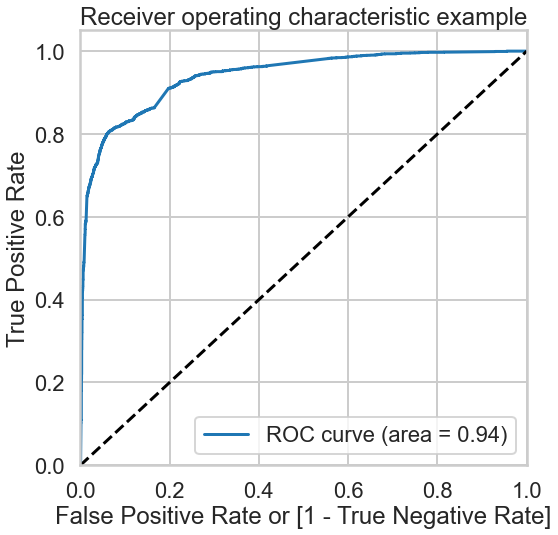

In [607]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [608]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.082977,0,1,0,0,0,0,0,0,0,0,0
1,1,0.989498,1,1,1,1,1,1,1,1,1,1,1
2,0,0.018658,0,1,0,0,0,0,0,0,0,0,0
3,0,0.738613,1,1,1,1,1,1,1,1,1,0,0
4,0,0.392332,0,1,1,1,1,0,0,0,0,0,0


In [609]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.384045,1.000000,0.000000
0.1,0.1,0.762214,0.956924,0.640813
0.2,0.2,0.819264,0.937601,0.745482
0.3,0.3,0.859926,0.848631,0.866968
0.4,0.4,0.882344,0.813205,0.925452
0.5,0.5,0.884354,0.783011,0.947540
0.6,0.6,0.878169,0.750000,0.958082
0.7,0.7,0.871367,0.714573,0.969127
0.8,0.8,0.861936,0.671900,0.980422
0.9,0.9,0.833333,0.584138,0.988705


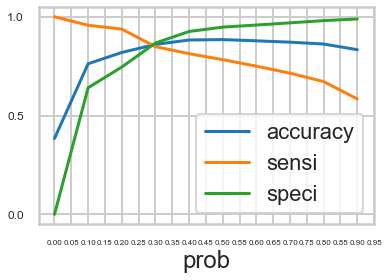

In [610]:
# Plotting it
sns.set_style("whitegrid")
sns.set_context("poster")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

In [611]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.082977,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.989498,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.018658,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.738613,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.392332,0,1,1,1,1,0,0,0,0,0,0,1


In [612]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8722943722943723

In [613]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3590,  394],
       [ 432, 2052]], dtype=int64)

In [614]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [615]:
# Calculating the sensitivity
TP/(TP+FN)

0.8260869565217391

In [616]:
# Calculating the specificity
TN/(TN+FP)

0.9011044176706827

# 8. Prediction on Test set

In [617]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [618]:
# Substituting all the columns in the final train model
col = X_train.columns

In [619]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,What is your current occupation_Other,Tags_Others,Tags_Will revert after reading the email
4608,1.0,0.003521,4.581818,0.010637,0,0,1,0
7935,1.0,0.000880,16.890909,0.007968,0,1,1,0
4043,1.0,0.000440,0.036364,0.003984,0,0,1,0
7821,1.0,0.000880,5.872727,0.007968,0,0,0,0
856,1.0,0.001320,3.654545,0.011952,0,1,1,0
...,...,...,...,...,...,...,...,...
4184,1.0,0.000000,0.000000,0.000000,0,0,1,0
5023,1.0,0.001761,5.290909,0.015936,0,1,1,0
6661,1.0,0.000000,0.000000,0.000000,0,0,0,0
2201,1.0,0.002201,2.345455,0.009960,0,0,0,0


In [620]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,0,1.000000
2,0,0.289192
3,0,1.000000
4,0,0.999992


In [621]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,0,1.000000,1
2,0,0.289192,0
3,0,1.000000,1
4,0,0.999992,1
...,...,...,...
2767,0,0.266506,0
2768,0,1.000000,1
2769,0,0.010659,0
2770,0,0.989365,1


In [622]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5180375180375181

In [623]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 435, 1260],
       [  76, 1001]], dtype=int64)

In [624]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [625]:
# Calculating the sensitivity
TP/(TP+FN)

0.9294336118848654

In [626]:
# Calculating the specificity
TN/(TN+FP)

0.25663716814159293

# 9. Precision-Recall

In [627]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3775,  209],
       [ 539, 1945]], dtype=int64)

In [628]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9029712163416899

In [629]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.783011272141707

## 9.1. Precision and recall tradeoff

In [630]:
from sklearn.metrics import precision_recall_curve

In [631]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [632]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


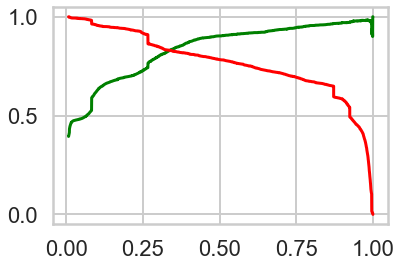

In [633]:
sns.set_style("whitegrid")
sns.set_context("poster")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [634]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.082977,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.989498,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.018658,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.738613,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.392332,0,1,1,1,1,0,0,0,0,0,0,0


In [635]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8829622758194187

In [636]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3701,  283],
       [ 474, 2010]], dtype=int64)

In [637]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [638]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8765808983863934

In [639]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8091787439613527

# 10. Prediction on Test set

In [640]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,1.000000
1,0,1.000000
2,0,0.289192
3,0,1.000000
4,0,0.999992


In [641]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,0,1.000000,1
2,0,0.289192,0
3,0,1.000000,1
4,0,0.999992,1
...,...,...,...
2767,0,0.266506,0
2768,0,1.000000,1
2769,0,0.010659,0
2770,0,0.989365,1


In [642]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.5212842712842712

In [643]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[ 444, 1251],
       [  76, 1001]], dtype=int64)

In [644]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [645]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.44449378330373

In [646]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.9294336118848654

#### Observation:
After running the model on the Test Data these are the figures we obtain:

*Accuracy : 87.22%

*Sensitivity : 82.60%

*Specificity : 90.11%

#### Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 

*Accuracy : 87.22%

*Sensitivity : 82.60%

*Specificity : 90.11%

Test Data: 

*Accuracy : 51.80%

*Sensitivity : 92.94%

*Specificity : 25.66%